In [1]:
import numpy as np
import matplotlib.pyplot as plt
from polynomial_gossip import *

# 2D random geometric graph

### Parameters

In [2]:
n = 1600
d = 2
r = 1.5/n**(1/d) 

methods = [("jacobi",2),"simple","shift-register","local averaging"]

n_graphs = 10
T = 400

### Simulation

In [3]:
results_averaged = {}
for method in methods:
    results_averaged[method] = np.zeros(T)
    
for graph in range(n_graphs):
    A, positions = adjacency_and_positions_rdm_geom_graph(n,d,r)
    W = gossip_matrix_from_adjacency_matrix(A)
    W = largest_component(W)
    n_nodes = W.shape[0]
    initial_values = np.random.randn(n_nodes)
    results = do_the_gossip(methods,T,W,initial_values)
    for method in methods:
        results_averaged[method] += results[method]

for method in methods:
    results_averaged[method] /= n_graphs

### Generation of Figure 2E

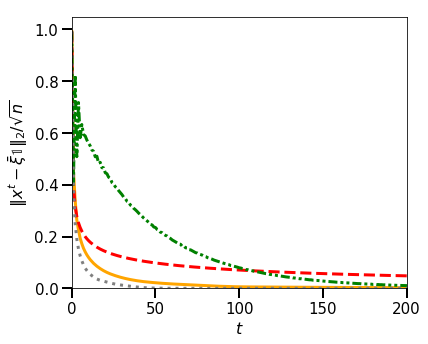

In [4]:
fig = plot_curves(results_averaged, T, 
                  legend=False, logscale=False, 
                  xmin=0, xmax=200, ymin=0, ymax=1.05, 
                  figsize=(6,5))
plt.show()

# 3D random geometric graph

### Parameters

In [5]:
n = 1728
d = 3
r = 1.5/n**(1/d)

methods = [("jacobi",3),"simple","shift-register","local averaging"]

n_graphs = 10
T = 40

### Simulation 

In [6]:
results_averaged = {}
for method in methods:
    results_averaged[method] = np.zeros(T)
    
for graph in range(n_graphs):
    A, positions = adjacency_and_positions_rdm_geom_graph(n,d,r)
    W = gossip_matrix_from_adjacency_matrix(A)
    W = largest_component(W)
    n_nodes = W.shape[0]
    initial_values = np.random.randn(n_nodes)
    results = do_the_gossip(methods,T,W,initial_values)
    for method in methods:
        results_averaged[method] += results[method]

for method in methods:
    results_averaged[method] /= n_graphs

### Generation of Figure 2F

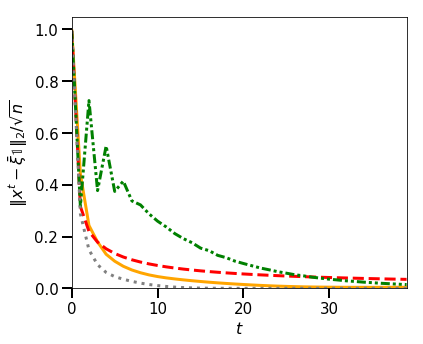

In [7]:
fig = plot_curves(results_averaged, T, 
                  legend=False, logscale=False, 
                  xmin=0, xmax=T-1, ymin=0, ymax=1.05, 
                  figsize=(6,5))
plt.show()